## Customer Reviews Analysis

In this project, I developed and visualized a similarity matrix to be used for exciting text analysis.

### Part 1 Getting the Yelp Reviews data for Equinox New York

In [1]:
import json

with open('normalized_yelp_reviews.json') as f:
  review = json.load(f)

review

['recent equinox member experience glitches booking policy blocked class booking reaching flatiron manager cloonan resulted short thanks truly appreciate great customer service experience',
 'state equipment machines different weights spacious changing rooms always clean juice press right inside facility makes awesome clean breakfast lunch working reason stars classes really almost point properly never happen equinoxes classes teachers',
 'incredibly crowded squat racks total blocking whole squat using front shower morning expect trailed multiple aisles lockers weird personal trainer demanded leave machine client needed tried clarify share sharing thing sound needed leave machine entirely walked smoothie started workout entrance insisted beforehand apparently member algae smoothie super weird equinoxes gotten overpriced smoothie pretty location flagship location treat members reopen covid',
 'joined equinox allowed reopen favorite equinox location staff beautiful selection equipment lo

### Part 2 Creating a frequency matrix of each word mentioned (using Sklearn)

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = review

In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['abcnews', 'absence', 'absolute', 'absolutely', 'abundance', 'accept', 'access', 'accident', 'acclimate', 'accommodating', 'according', 'account', 'accoutrements', 'accurate', 'aches', 'acoustics', 'across', 'acted', 'acting', 'actions', 'active', 'activities', 'actual', 'actually', 'added', 'addiction', 'addicts', 'addition', 'additional', 'address', 'admit', 'advantage', 'advertising', 'advice', 'advised', 'adviser', 'advisor', 'aerobics', 'affectionately', 'afford', 'afraid', 'afternoon', 'afternoons', 'agency', 'ageskids', 'aggression', 'aggressive', 'aggressively', 'agree', 'agreed', 'agreement', 'ahead', 'aimee', 'aired', 'aisle', 'aisles', 'algae', 'algernon', 'alienated', 'aligned', 'alleviation', 'allllll', 'allow', 'allowed', 'almost', 'alone', 'along', 'already', 'alternative', 'although', 'always', 'amaze', 'amazed', 'amazing', 'amazingly', 'amenities', 'amenties', 'ammirato', 'among', 'amongst', 'amount', 'ample', 'amsterdam', 'analyze', 'anatomy', 'angel', 'angry', 'anni

In [4]:
X_result = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
print(X_result)

     abcnews  absence  absolute  absolutely  abundance  accept  access  \
0          0        0         0           0          0       0       0   
1          0        0         0           0          0       0       0   
2          0        0         0           0          0       0       0   
3          0        0         0           0          0       0       0   
4          0        0         0           0          0       0       0   
..       ...      ...       ...         ...        ...     ...     ...   
145        0        0         1           1          0       0       0   
146        0        0         0           0          0       0       0   
147        0        0         0           0          0       0       0   
148        0        0         0           0          0       0       0   
149        0        0         0           0          0       0       0   

     accident  acclimate  accommodating  ...  write  writing  wrong  wussy  \
0           0          0         

### Part 3  Delete unwanted columns (appear <5 times)

In [26]:
X_result_filtered = X_result[X_result != 0].count()

X_temp = X_result_filtered[X_result_filtered >= 5].index.tolist()

X_final = X_result[X_temp]

X_final

,absolutely,access,actually,advisor,almost,along,already,although,always,amazing,...,wonderful,worked,working,workout,works,worse,worst,worth,would,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
146,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Task 4

Create a correlation matrix `S` across words based on the term frequency matrix `X`. A correlation between two words is a correlation between the two vectors indicating which reviews the words appeared in (and how often).

In [27]:
corrMatrix = X_final.corr()
corrMatrix

,absolutely,access,actually,advisor,almost,along,already,although,always,amazing,...,wonderful,worked,working,workout,works,worse,worst,worth,would,years
absolutely,1.000000,-0.044431,3.432497e-02,-0.032657,1.706123e-01,-0.032657,-0.037127,-0.032657,0.069684,0.144669,...,0.079114,-0.038910,-0.044431,0.099705,0.100053,-0.035898,0.154186,0.186483,0.195643,0.158079
access,-0.044431,1.000000,1.109506e-01,0.422236,9.191333e-02,-0.046915,-0.053336,-0.046915,0.062189,-0.012329,...,-0.044199,0.043919,0.024823,0.023873,0.043919,-0.051571,-0.077826,-0.090895,0.145935,-0.035747
actually,0.034325,0.110951,1.000000e+00,-0.054366,-1.262572e-17,-0.054366,0.169970,0.054366,0.063277,-0.065312,...,-0.051219,0.027761,0.090404,-0.036886,0.027761,0.039841,0.048562,0.227293,0.137795,-0.004873
advisor,-0.032657,0.422236,-5.436603e-02,1.000000,-4.503773e-02,0.172414,-0.039203,-0.034483,0.107026,0.036248,...,-0.032487,-0.041085,0.109469,-0.070186,-0.041085,-0.037905,-0.057202,0.038678,-0.018539,0.027820
almost,0.170612,0.091913,-1.262572e-17,-0.045038,1.000000e+00,-0.045038,0.044802,-0.045038,0.008737,-0.054106,...,-0.042430,-0.053661,0.040850,-0.091670,-0.053661,0.074261,0.097700,-0.018370,-0.076101,0.096893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
worse,-0.035898,-0.051571,3.984095e-02,-0.037905,7.426107e-02,-0.037905,0.360904,0.151620,-0.041667,-0.045537,...,-0.035711,-0.045162,0.091682,-0.012859,0.116131,1.000000,0.178963,-0.073438,0.045125,0.098537
worst,0.154186,-0.077826,4.856157e-02,-0.057202,9.769954e-02,-0.057202,-0.065032,0.074803,-0.027314,-0.068720,...,-0.053891,0.044188,-0.077826,-0.026868,0.044188,0.178963,1.000000,0.023780,0.106119,0.188145
worth,0.186483,-0.090895,2.272931e-01,0.038678,-1.837009e-02,0.038678,-0.000999,0.144165,0.091400,0.038546,...,-0.062941,0.010174,0.068570,0.042942,0.010174,-0.073438,0.023780,1.000000,0.170682,0.016075
would,0.195643,0.145935,1.377954e-01,-0.018539,-7.610134e-02,-0.058266,0.103126,-0.018539,-0.042642,-0.040169,...,-0.054893,0.234863,0.100894,0.380044,-0.035613,0.045125,0.106119,0.170682,1.000000,0.139598


### Part 5 Explored similar and dissimilar terms mentioned along with 'amazing'

In [31]:
most_sim = corrMatrix.loc[:,"amazing"].sort_values(ascending = False).index.tolist()[:20]

most_sim

['amazing',
 'waiting',
 'possible',
 'honestly',
 'favorite',
 'beyond',
 'needs',
 'probably',
 'facility',
 'works',
 'sometimes',
 'everyone',
 'minutes',
 'extremely',
 'client',
 'people',
 'especially',
 'class',
 'great',
 'always']

In [29]:
least_sim = corrMatrix.loc[:,"amazing"].sort_values(ascending = True).index.tolist()[:20]

least_sim

['times',
 'still',
 'worst',
 'clean',
 'facilities',
 'corporate',
 'actually',
 'month',
 'seems',
 'manager',
 'looking',
 'thing',
 'sessions',
 'price',
 'asked',
 'months',
 'least',
 'going',
 'place',
 'almost']

### Part 6 Network graphing using Networkx package

In [50]:
!pip install decorator==5.0.7
# this command ensures plotting will work properly inside the notebook
%matplotlib notebook 
import matplotlib.pyplot as plt # visualization library
import networkx as nx # network manipulation library

# transform correlation matrix into a data frame of edges (3 columns only):
edges = corrMatrix.stack().reset_index()
edges.columns = ['word1', 'word2', 'corr_value']

# take absolute value of the correlation (we are interested in negatively or positively correlated words)
edges['corr_value'] = edges['corr_value'].abs()
 
# keep only correlations over a threshold and remove self correlation (cor(A,A)=1)
edges_filtered = edges[ (edges['corr_value'] > 0.5) & (edges['word1'] != edges['word2'])]

In [51]:
# here is the set of edges that we get
edges_filtered

,word1,word2,corr_value
1680,already,instead,0.507743
2541,amazing,possible,0.502287
2619,amazing,waiting,0.559999
2948,amount,constantly,0.623158
3153,amount,weights,0.544127
...,...,...,...
65586,weight,locker,0.506780
65747,weights,amount,0.544127
65780,weights,constantly,0.622323
66140,weird,needed,0.575331


<IPython.core.display.Javascript object>


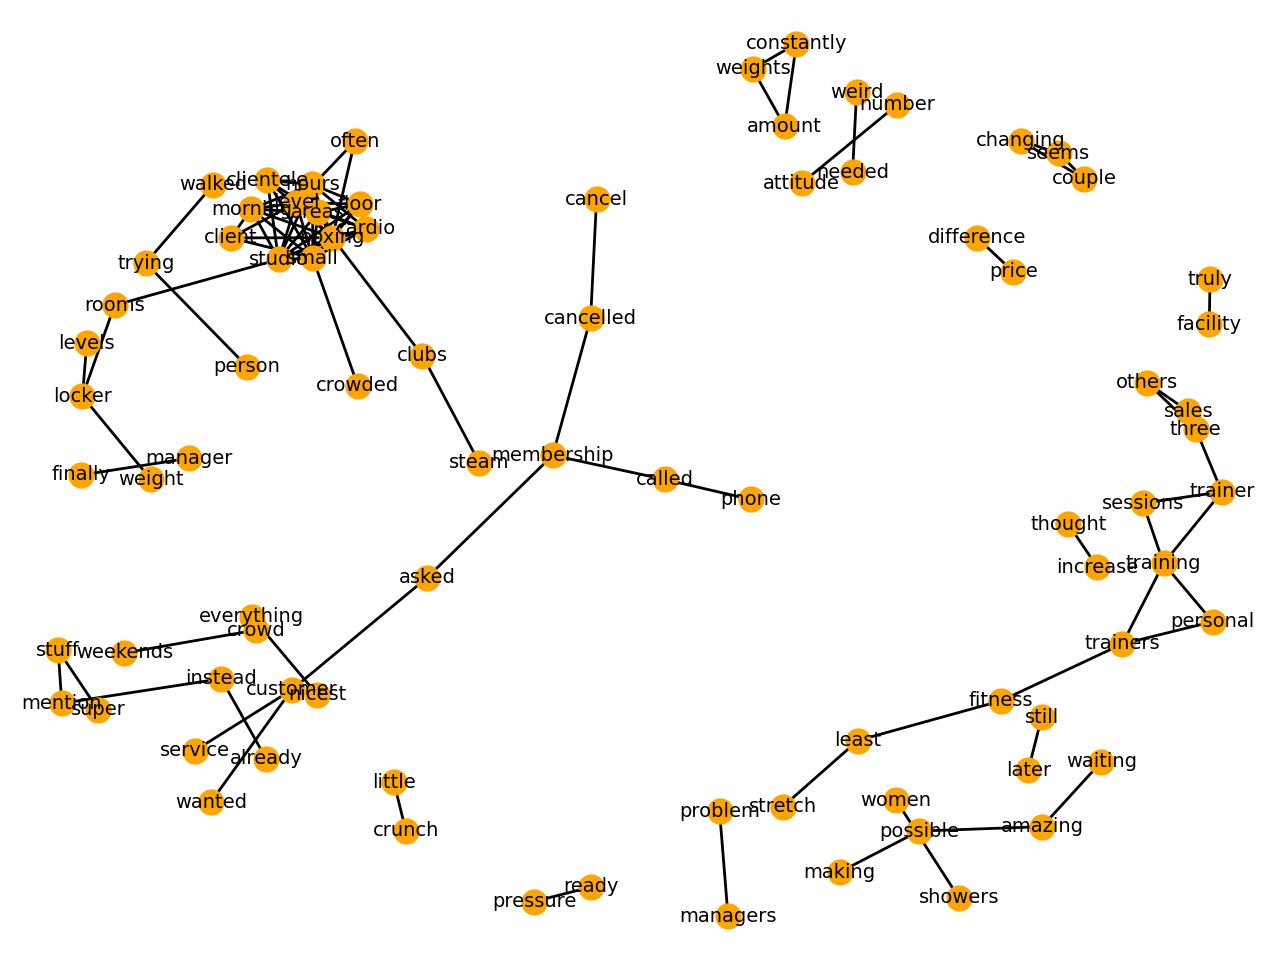

In [52]:
# build the graph / network
G = nx.from_pandas_edgelist(edges_filtered, 'word1', 'word2')

# layout
pos = nx.spring_layout(G, k=0.25, iterations=40)

# create canvas
plt.figure()

# plot the network
nx.draw(G, pos=pos, with_labels=True, node_color='orange', node_size=80, 
        edge_color='black', linewidths=0.5, font_size=7)

# show the visualization
plt.show()

This graph shows all the different nodes of words that are closely correlated, which means words that are often mentioned together in customer reviews. Some of the topics are more talked about than others, resulting in some nodes bigger and denser than others. I see different topics, such as about the training facilities ("boxing", "studio", "level", "floor", "cardio", etc.), and about the trainers ("personal", "trainer", "training", etc.), and also about membership ("membership", "called", etc.). Through manipulating the threshold in the code above, for example, making it 0.7 rather than 0.5, it gives us a closer look at words that are more highly correlated. 

### Part 7  Cluster: Correlation across reviews rather than across words

In [54]:
corr_new = X_final.T.corr()

corr_new

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.000000,-0.061378,-0.020821,0.102888,0.148554,-0.041894,0.082488,-0.026188,0.180011,0.321128,...,0.076780,0.019731,-0.018447,-0.046437,-0.009097,-0.000622,0.084911,0.101375,-0.034846,-0.029336
1,-0.061378,1.000000,-0.088732,0.080068,-0.026294,0.069217,0.020088,-0.036057,0.014278,0.008682,...,0.362040,0.081829,0.114294,0.004838,0.217100,0.080116,0.357255,0.263393,0.253590,0.137328
2,-0.020821,-0.088732,1.000000,-0.016814,-0.035200,0.099325,-0.076352,0.045432,0.102941,-0.010940,...,-0.046548,-0.063309,0.090673,0.049782,-0.054139,-0.013553,0.016603,-0.016389,-0.050375,-0.042410
3,0.102888,0.080068,-0.016814,1.000000,0.165045,0.207673,0.074226,-0.034163,0.184877,0.090490,...,0.126008,0.236673,-0.024064,0.004584,0.077136,0.014760,0.174793,0.277285,0.110394,0.053577
4,0.148554,-0.026294,-0.035200,0.165045,1.000000,-0.042624,0.118829,-0.026645,0.177509,0.024989,...,-0.032759,0.088106,0.242016,0.187370,0.079159,-0.044575,-0.045442,0.056911,0.034920,-0.029847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.000622,0.080116,-0.013553,0.014760,-0.044575,-0.022177,0.000159,-0.038931,0.001629,0.042071,...,0.054870,-0.005217,-0.027423,0.223851,0.218684,1.000000,0.218624,0.208090,0.091148,0.124875
146,0.084911,0.357255,0.016603,0.174793,-0.045442,0.010793,-0.029026,-0.026238,0.064811,0.294244,...,0.508470,0.034922,-0.018482,0.184978,0.220045,0.218624,1.000000,0.269754,0.278583,0.044508
147,0.101375,0.263393,-0.016389,0.277285,0.056911,0.047941,0.059827,-0.024974,0.009889,0.171391,...,0.194466,0.089490,0.369427,0.180278,0.046990,0.208090,0.269754,1.000000,0.071207,0.218210
148,-0.034846,0.253590,-0.050375,0.110394,0.034920,-0.032747,-0.008309,0.172536,0.050564,0.090135,...,0.291229,-0.034231,-0.014419,0.095975,0.244304,0.091148,0.278583,0.071207,1.000000,0.150032


In [55]:
# this command ensures plotting will work properly inside the notebook
%matplotlib notebook 
import matplotlib.pyplot as plt # visualization library
import networkx as nx # network manipulation library

# transform correlation matrix into a data frame of edges:
edges = corr_new.stack().reset_index()
edges.columns = ['word1', 'word2', 'corr_value']

# take absolute value of the correlation (both negatively or positively correlated words)
edges['corr_value'] = edges['corr_value'].abs()
 
# keep only correlations over a threshold and remove self correlation when cor(A,A)=1
edges_filtered = edges[ (edges['corr_value'] > 0.5) & (edges['word1'] != edges['word2'])]

In [56]:
# here is the set of edges that we get
edges_filtered

,word1,word2,corr_value
471,3,21,0.509335
511,3,61,0.554571
815,5,65,0.543676
1547,10,47,0.556402
2280,15,30,0.526364
2285,15,35,0.512324
2622,17,72,0.625620
3153,21,3,0.509335
4515,30,15,0.526364
4587,30,87,0.570238


<IPython.core.display.Javascript object>


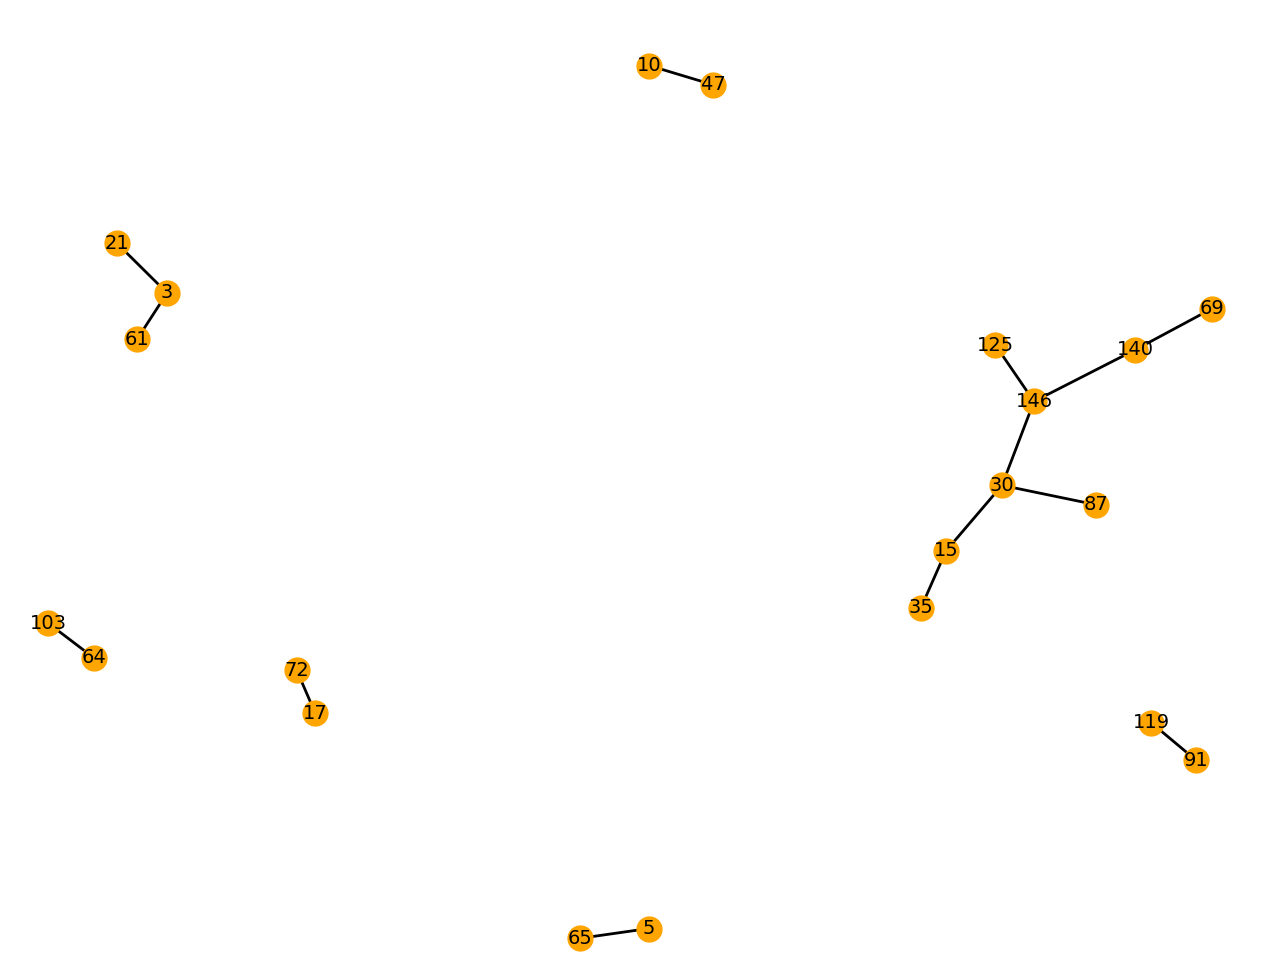

In [57]:
# build the graph / network
G = nx.from_pandas_edgelist(edges_filtered, 'word1', 'word2')

# layout
pos = nx.spring_layout(G, k=0.25, iterations=40)

# create canvas
plt.figure()

# plot the network
nx.draw(G, pos=pos, with_labels=True, node_color='orange', node_size=80, 
        edge_color='black', linewidths=0.5, font_size=7)

# show the visualization
plt.show()

7 clusters of reviews emerge from the graph above. These clusters seem less complex when comparing to the word clusters above. To be closely correlated suggests these reviews are likely discussing similar topics. Below I will analyze two clusters. 

In [60]:
review[103]

'great class offerings convenient location especially friends classes however crowded hours locker rooms unbearably crowded several members items spend trying uncover locker always showers therefore never bothered shower showers compact locations whole comprised levels total street level houses check weight machines maybe locker basement level contains women locker check stretching additional weights machines third fourth levels cardio machines stretching areas single cardio machine available either floor screens floor smaller fourth floor workout studio large spacious small boxing studio would recommend class evenings kicking definitely challenging class great forget cycling studio really spinner equinox location would frequent'

In [61]:
review[64]

'location variety reasons first housed within architecturally interesting location often crowded times sufficiently large layout several levels generally means cardio equipment cleaning staff always working ensuring floor entire remodeled summer locker refresh looks great level gallery currently renovating ground floor class areas space squeezed locker rooms gross locker often smells vinegar showers always fresh clean'

The first cluster I see are the two reviews above. They are closely correlated because they are both taking about the location and the facilities, as they both mention something about the "locker room" and "showers" and "levels", it seems like both customers are talking about where are the facilities located in this gym.

In [62]:
review[146]

'classes place great kickboxing classes classes sometimes crowded especially monday nights ilaria think making level great facilty location variety equipment classes always clean personally experienced friend locker great treadmills right'

In [63]:
review[125]

'badly needs classes especially afternoon strangely classes afternoon mornings sparse selection evening classes classes great jammed point impossible stretch without hitting neigbhor constantly running promotions members wonder squeeze staff teachers professional juice place'

In [64]:
review[30]

'really normally equinox williamsburg opinion nicer newer great classes location expected'

Another cluster I see include (but not limited to) the three reviews above. They are closely correlated because they are all talking about classes at this gym. The first two reviews mention the time period for selecting classes, as seen in "monday nights" and "afternoon", this overlap makes them even more closely correlated (shorter edge between them) than with the third review, which does not mention anything about time of the day/week.